#                                           Student Score Prediction

The following dataset student_scores.csv provides data about the number of hours studied by a student and the marks 
he/she scored. The objective is to train a model based on the above data and predict the marks obtained on studying a 
given number of hours by a student.

### Import Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
score = pd.read_csv('student_scores.csv')

### Description of Dataset

In [7]:
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
score.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
score

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### EDA

We now attempt to find correlation between the two columns - Time and Hours using suitable visualizations.

* Jointplot 

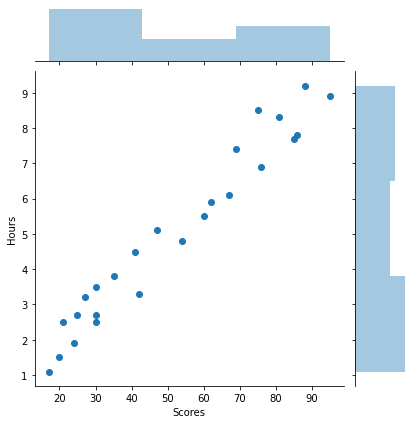

In [13]:
sns.jointplot(score['Scores'], score['Hours'])

* Pairplot

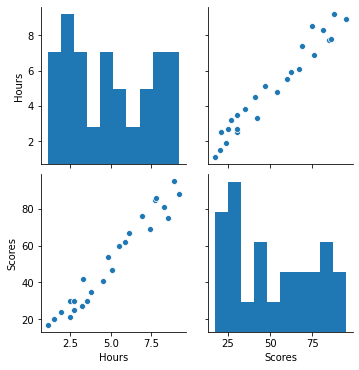

In [16]:
sns.pairplot(score)

Clearly, the plot between 'Hours' and 'Scores' shows a linear relationship between marks obtained and hours studied.


Using the inbuilt lmplot method of seaborn library, we can build a linear model plot as shown.

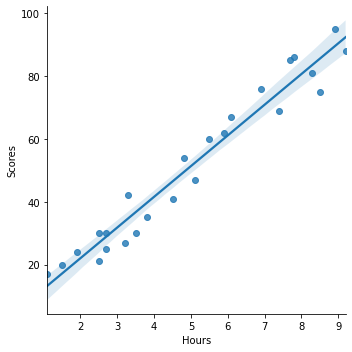

In [17]:
sns.lmplot(x = 'Hours', y= 'Scores', data = score)

### Training and Testing Data

Now that we have explored the data a bit, let us split the data into train set and test set.

We set X to 'Hours and Y to 'Scores'

In [56]:
X = score[['Hours']]
y = score[['Scores']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101 **

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Training the Model

Now, its time to train our model. Import LinearRegression from sklearn.linear_model

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lm = LinearRegression()

Train/fit on the training data

In [61]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of the attribute 'Hours'

In [62]:
lm.coef_

array([[9.91065648]])

### Predicting Test Data

In [66]:
predictions = lm.predict(X_test)

Intercept

In [67]:
lm.intercept_

array([2.01816004])

Plotting real test values against predicted values using a scatter plot

Text(0, 0.5, 'Predicted Marks')

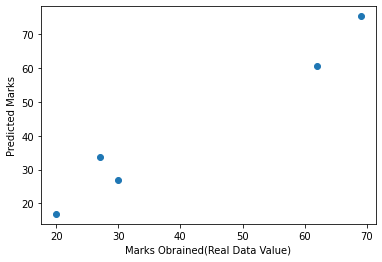

In [69]:
plt.scatter(x = y_test, y = predictions)
plt.xlabel('Marks Obrained(Real Data Value)')
plt.ylabel('Predicted Marks')

### Evaluating our Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [70]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.183859899002975
MSE: 21.598769307217406
RMSE: 4.647447612100367


In [72]:
R_squared = metrics.explained_variance_score(y_test, predictions)
R_squared

0.9482829156738147

### Conclusion
Let us answer the question asked in the problem statement. But, before that let us look at the coefficient.

In [76]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
cdf

,Coefficient
Hours,9.910656


### What will be predicted score if a student study for 9.25 hrs in a day?

In [104]:
hours = [[9.25]]
print('Number of hours studied: ', hours[0][0])
pred_score = lm.predict(hours)
print('Percentage Scored: {} percent'.format(pred_score[0][0]))

Number of hours studied:  9.25
Percentage Scored: 93.69173248737535 percent


## Thank You!